In [1]:
""" 
Coursework for k-means, spectral agglomerative clustering algorithms,
as well as ensemble clustering.
""" 

from matplotlib import pyplot as plt
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
import numpy as np
import warnings

## Part 1. K-means Clustering Analysis

### a) Complete an implementation of the partition function.

In [2]:
# a) Complete an implementation of the partition function.
from sklearn.metrics.pairwise import euclidean_distances
def partition(X, mu):
    """
    The function that produces a partition given the mean points use Euclidean distance
    Each input is numpy array:
        - X: (N, d), tha data
        - mu: (C, d), the mean points
    Returns:
        partition: (N), the label of partition that each datapoint belongs to
    """
    #X: N data,d features
    #step1: calculate distances (similarities) between all the points in X and K cluster centres
    distance=euclidean_distances(X, mu)**2
    #Step 2: find out the closest cluster centre for each data point in X and assign the data point to this cluster
    label=np.argmin(distance, axis=1)   # Min index along the second axis  
    return label

### (b) apply the built-in K-means function to the dataset for clustering analysis with 3 given different initialisation settings, respectively

In [98]:
# Load data
X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) 

In [142]:
mu_a.shape

(1, 2)

In [4]:
kmeans = KMeans(n_clusters=3,init=mu_a).fit(X)
label_final_a=kmeans.labels_
final_center_a=kmeans.cluster_centers_
#print(kmeans.labels_)
kmeans1 = KMeans(n_clusters=3,init=mu_b).fit(X)
label_final_b=kmeans1.labels_
final_center_b=kmeans1.cluster_centers_
#print(kmeans1.labels_)
kmeans2 = KMeans(n_clusters=3,init=mu_c).fit(X)
label_final_c=kmeans2.labels_
final_center_c=kmeans2.cluster_centers_
#print(kmeans2.labels_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


###  (c) Visualise initial partitions and final partitions
Based on the clustering analysis results achieved in (b), use your partition function implemented in (a) to create 6 scatter plots corresponding to 3 initial partitions and 3 final partitions in order to visualise 6 partitions. You are asked to display 6 plots in a 2×3 grid; <br/>
The first row shows 3 initial partitions and the second row shows 3 final partitions aligned with their corresponding initial partitions shown in the first row. In each scatter plot, you must mark the cluster centroids with the red-coloured "+", all the data points in a cluster must be marked with the same colour (but different from red to allow for seeing their centroid clearly) and different clusters must be indicated by different colours. (Hint: to carry out the display format described above, you may use the built-in function, matplotlib.pyplot.subplot.)

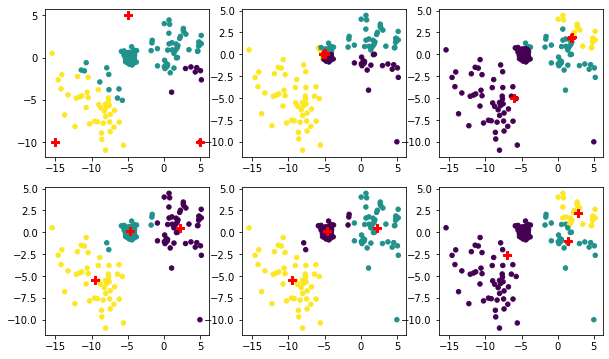

In [5]:
# Load data
X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) 

#############################
# b) Display the final and initial partitions in 2 rows and 3 columns
plt.figure(figsize=(10,6)) # do not change, this makes the figure size readable

#define inital patition
label_initial_a=partition(X,mu_a)
label_initial_b=partition(X,mu_b)
label_initial_c=partition(X,mu_c)
#p=position
def centroid_plots(X,mu,labels,po):
    fig = plt.subplot(2, 3,po)
    plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');
    #mark the cluster centroids with the red-coloured "+"
    plt.scatter(mu[:, 0],
                mu[:, 1],
                s=50, c='red',
                marker='P')
#plot inital patition
centroid_plots(X,mu_a,label_initial_a,1)
centroid_plots(X,mu_b,label_initial_b,2)
centroid_plots(X,mu_c,label_initial_c,3)
#plot final patition
centroid_plots(X,final_center_a,label_final_a,4)
centroid_plots(X,final_center_b,label_final_b,5)
centroid_plots(X,final_center_c,label_final_c,6)

###  (a) implement the scatter-based F-ratio index in Python where Euclidean distance is used

In [9]:
def f_ratio_euclidean(X, lb):
    k = len(np.unique(lb))
    m = 1/X.shape[0]*np.array([np.sum(X[:,0]),np.sum(X[:,1])])
    c = []
    c1 = []
    for j in range(k) :
        kj=[]
        for i in range(X.shape[0]):
            if lb[i] == j:
                kj.append(X[i])
        kj = np.array(kj) 
        mj=1/kj.shape[0]*np.array([np.sum(kj[:,0]),np.sum(kj[:,1])])
        c.append (np.sum(np.square(kj - mj)))
        c1.append(kj.shape[0]*np. sum(np.square (m-mj)))
    c= np.array(c)
    c1=np.array(c1)
    SSW = np. sum(c)
    SSB = np. sum(c1)
    f_ratio=k*SSW/SSB
    return f_ratio

### (b) 
for K = 2, 3, · · · , 10, run the the K -means built-in function, sklearn.cluster.KMeans, in the scikit-learn library with Euclidean distance on the dataset, kmeans_data_2.npy (for each K, you must run K-means with 3 different random initialisation conditions set by yourself), then plot F-ratio index (y-axis) versus K (x-axis) (in this plot, for each K, use only the least F-ratio index value measured on 3 partitions resulting from different initialisation conditions), and report the optimal number of clusters in this data set;

In [7]:
################
# (b) run the the K-means each with 3 different random initialisations for different K
K=np.arange(2,11,1)
X = np.load('./Data/kmeans_data_2.npy')

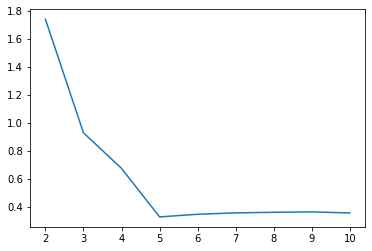

In [10]:
#define k_means 
f_ratio_y=[]
for k_i in K:
    f_set=[]
    for count in range(0,3):
        kmeans_F = KMeans(n_clusters=k_i,random_state=0).fit(X)
        label_F=kmeans_F.labels_
        f_set.append(f_ratio_euclidean(X,label_F))
    f_ratio_y.append(np.min(f_set))
axis_x=K
axis_y=f_ratio_y
plt.plot(axis_x,axis_y)

### The plot shows that the optimal k is 5

###  (c) display the final partition corresponding to the optimal number of clusters you find out in (b) with the the same display format described in Assignment 1.

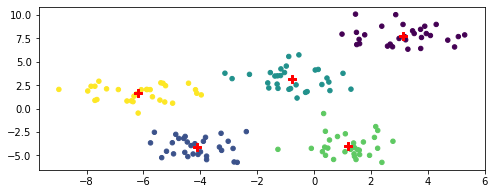

In [11]:
# (c) Display the final partition with optimal number of clusters
plt.figure(figsize=(8,3))
kmeans_f = KMeans(n_clusters=5,random_state=0).fit(X)
center=kmeans_f.cluster_centers_
label_f=kmeans_f.labels_
def centroid_plots(X,mu,labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');
    #mark the cluster centroids with the red-coloured "+"
    plt.scatter(mu[:, 0],
                mu[:, 1],
                s=50, c='red',
                marker='P')

#plot final patition
centroid_plots(X,center,label_f)
plt.show()

## Part 2. Spectral Clustering Analysis

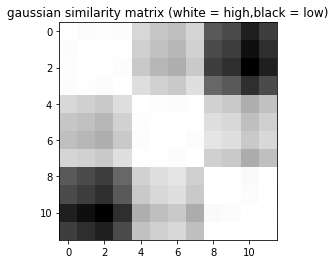

<ipython-input-15-b0f771368450>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  eig_pairs=np.array(eig_pairs)


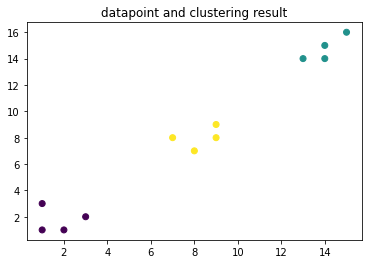

In [15]:
# Here you are to implement the asymmetric normalised spectral clustering algorithm.

from sklearn.metrics import pairwise_distances
from numpy.linalg import inv
def gaussian_similarity(X,delta):
    """
    # Compute the similarity matrix for spectral clustering using an RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result
    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    W=[]
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            s=np.exp(-np.sum((X[i]-X[j])**2)/(2*delta**2))
            W.append(s)
    W=np.array(W)
    W=W.reshape(-1,X.shape[0])
    return W

#asymmetric_SC for the asymmetric normalised spectral clustering in your implementation. 
#(Hint: To implement the asymmetric_SC function, you can use the built-in function, 
#np.linalg.eig, in the numpy library for eigen analysis and two built- in functions 
#in the scikit-learn library, sklearn.cluster.KMeans for K-means clustering and 
#pairwise_distances for measuring the distances between data points.)
import math
from scipy.sparse import csr_matrix
def asymmetric_SC(W,k = 1):
    """
    # Compute the spectral clustering according to [Shi and Malik 2000]
    # See http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    Input:
        - W: (n,n), similarity matrix or weighted adjacency matrix
        - k: scalar, number of clusters
            
    
    Return:
        - lb: (n,) label for each datapoint
        - e: 1-d array of eigen value
        - v: 2-d matrix, each column is an eigen vector
    """
    ###
    # Hint: Be wary that "Asymmetric Normalized" spectral clustering does eigen analysis on D^-1 * L .
    #       See lecture slides if you don't know how to start 
    #
    # Hint: Computing the invert matrix is computationally expensive for high-dimensional
    #       matrices. But here, we only need to the invert a diagonal matrix, which is simple to compute.
    #
    # Hint: There is no unreal eigen value here, but sometimes numerical precision problems happen.
    #       Use np.real when necessary.
    #
    # First do eigen analysis. 
    #D is degree matrix
    D=[]
    #D = np.diag(np.sum(W, axis=1))
    for i in range(W.shape[0]):
        D.append(np.sum(W[i]))
    #Get D^-1
    D=np.diag(D)
    D_inv=np.linalg.inv(D)
    #step 2: L matirx
    L=D-W
    L_SC=D_inv.dot(L)

    #do eigen analysis,e:value, v:vector
    e,v=np.linalg.eig(L_SC)
    #step3: compute first generalised K eigenvectors corresponding to K smallest eigenvalues
    #sort eigvalues and eigvector from small to big
    eig_pairs=[(e[i],v[:,i])for i in range(len(e))]
    eig_pairs.sort(key=lambda x:x[0],reverse=False)
    eig_pairs=np.array(eig_pairs)
    #first K eigenvector along with smallest eigenvalues 
    v_subset=eig_pairs[0:k,1]

    #step4:assembly v_subset, form lower-dimensional representation of data
    U = np.array(v_subset)
    U=np.vstack(U).T.real.astype(np.float32)
    #step5:apply K_means algorithem 
    kmeans_SC = KMeans(n_clusters=k,random_state=0).fit(U)
    #get lb
    lb=kmeans_SC.labels_  
    return lb,e,v

# The following code to be used for testing student's implementation during marking. Don't change!

X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])

W = gaussian_similarity(X,delta = 38)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()


lb,_,_ = asymmetric_SC(W,3)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

 Apply your implemented gaussian_similarity function in Assignment 3 to the dataset, SC_data_1.npy, to generate a Laplacian matrix. 

### (a) describe how you find out an appropriate hyperparameter value in the Gaussian kernel and explicitly report this value;

From the glaussian similarity matrix we can see that when the delta is 2, the picture shows a desirble result.

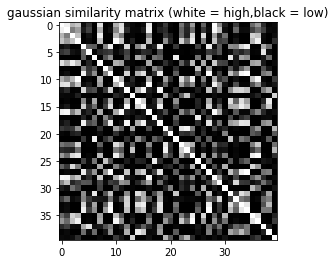

In [55]:
X = np.load('./Data/SC_data_1.npy')
W = gaussian_similarity(X,delta = 2)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()

(b) conduct eigen analysis on the Laplacian matrix, list all the elements of the eigenvector corresponding to the second smallest eigenvalue or the 1st smallest non-zero eigenvalue in a 4 × 10 table carried out by a proper 2-D array; 

In [53]:
X = np.load('./Data/SC_data_1.npy')
#generate Laplacian matrix
w=gaussian_similarity(X,2)
#D is degree matrix
D=[]
for i in range(W.shape[0]):
    D.append(np.sum(W[i]))
#Get D^-1
D=np.diag(D)
#step 2: L matirx
L=D-W
#do eigen analysis
e1,v1=np.linalg.eig(L)
eig_pairs=[(e1[i],v1[:,i])for i in range(len(e1))]
eig_pairs.sort(key=lambda x:x[0],reverse=False)
eig_pairs=np.array(eig_pairs)
#print("====eig_paris========")
if 0 in eig_pairs[0,:]:
    index=eig_pairs[0,:].index(0)
    eig_pairs[0,:].remove(0)
    v_subset_first=np.delete(eig_pairs[:,0],index)
v_subset_first=v_subset_first.reshape(4,10)
print('a) One hyperparameter value for Gaussian kernel:',2)
print('b) First non-zero eigen vector (rounded): \n',v_subset_first)

a) One hyperparameter value for Gaussian kernel: 2
b) First non-zero eigen vector (rounded): 
 [[ 0.11  0.09  0.15  0.14 -0.15 -0.08 -0.19  0.13 -0.19 -0.16]
 [ 0.15  0.11 -0.14  0.21 -0.17 -0.15  0.11 -0.22 -0.15  0.17]
 [ 0.21 -0.2   0.16  0.18  0.15 -0.21  0.16 -0.16  0.11 -0.01]
 [ 0.18 -0.18 -0.09 -0.16 -0.16  0.16  0.15 -0.11 -0.16  0.21]]


<ipython-input-53-a6533845156f>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  eig_pairs=np.array(eig_pairs)
<ipython-input-53-a6533845156f>:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if 0 in eig_pairs[0,:]:


(c) with the result achieved in (b), provide the computational evidence to decide how many clusters in this dataset and display the resultant partition in a 2-D plot where different clusters must be marked in different colours.

In [49]:
# c) 
# Most stable clustering is usually decided by a K that maximizes the
# eigengap (see the lecture slide)
K=np.arange(1,X.shape[0]+1)
val=eig_pairs[1:X.shape[0],0]

K_star=np.argmax(np.diff(val)[:1])+2
print('c) ',K_star , ' clusters, because the maximum eigengap is 2' )

c)  2  clusters, because the maximum eigengap is 2


### display the resultant partition in a 2-D plot where different clusters must be marked in different colours.

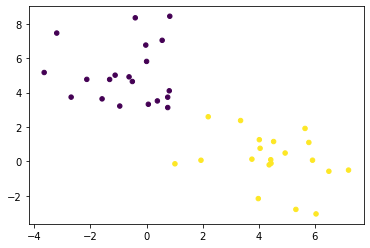

In [74]:
kmeans_star = KMeans(n_clusters=K_star,random_state=0).fit(X)
star_label=kmeans_star.labels_
plt.scatter(X[:, 0], X[:, 1], c=star_label,
        s=20, cmap='viridis')


Apply your implemented gaussian_similarity and asymmetric_SC functions in Assignment 3 to the dataset, SC_data_1.npy, with the number of clusters you find out in Assignment 4, and two other datasets of two clusters, SC_data_2.npy and SC_data_3.npy, respectively. In your answer notebook, (a) display the 3 resultant partitions of the datasets in 2-D plots where clusters must be marked in different colours, and (b) check whether this clustering algorithm works for all 3 datasets. If not, identify the dataset(s) it fails and explain why.

<ipython-input-15-b0f771368450>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  eig_pairs=np.array(eig_pairs)
<ipython-input-15-b0f771368450>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  eig_pairs=np.array(eig_pairs)
<ipython-input-15-b0f771368450>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  eig_pairs=np.array(eig_pairs)


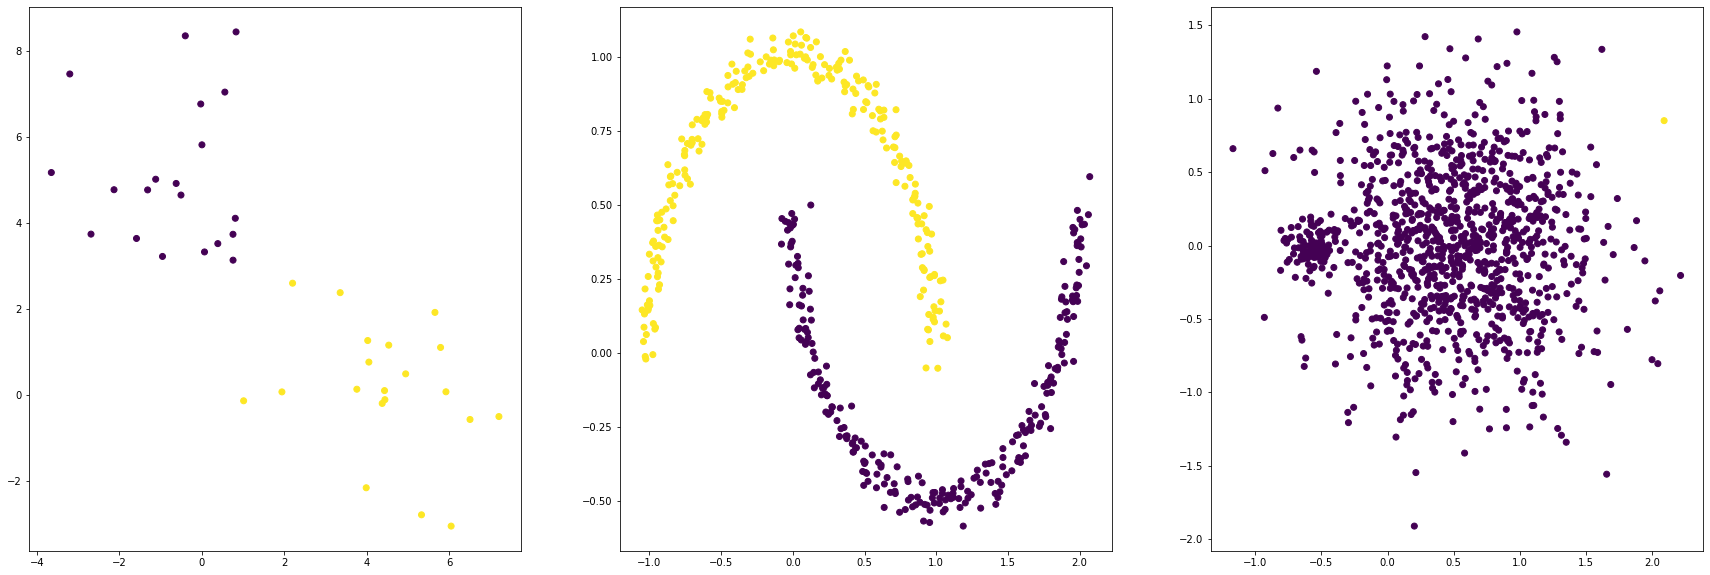

In [65]:
# Load data
X1 = np.load('./Data/SC_data_1.npy')
X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')

plt.figure(figsize=(30, 10))
#number of clusters that was found in Assignment4:K_star
W1=gaussian_similarity(X1,2)
W2=gaussian_similarity(X2,0.2)
W3=gaussian_similarity(X3,0.08)
lb1,_,_ = asymmetric_SC(W1,K_star)
lb2,_,_ = asymmetric_SC(W2,K_star)
lb3,_,_ = asymmetric_SC(W3,K_star)
fig = plt.subplot(1,3,1)
plt.scatter(X1[:,0],X1[:,1],c = lb1)
fig = plt.subplot(1,3,2)
plt.scatter(X2[:,0],X2[:,1],c = lb2)
fig = plt.subplot(1,3,3)
plt.scatter(X3[:,0],X3[:,1],c = lb3)
plt.show()


### (b) check whether this clustering algorithm works for all 3 datasets. If not, identify the dataset(s) it fails and explain why.

Set delta=2 on X1 dataset and delta=0.2 to the X2 dataset, delta=0.08 to the X3 dataset. From the output figures we can see that the cluster works well on the first and second dataset but not the third dataset, this is because spectral clustering unable to deal with overlapping clusters properly.<em>"However, the more noisy or overlapping the clusters are, the less effective is this heuristic."</em>.according to [Shi and Malik 2000]
 http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323

## Part 3. Hierarchical Clustering Analysis

You are asked to use Euclidean distance to produce the initial distance matrix and further apply the built-in function, scipy.cluster.hierarchy with three different cluster-distance metrics3: 
1. single-linkage,
2. complete-linkage 
3. group-average, 
in the scipy library to the dataset, HC_data.npy, respectively. 

### (a) plot three dendrogram trees achieved by the use of three cluster-distance metrics in the agglomerative algorithm

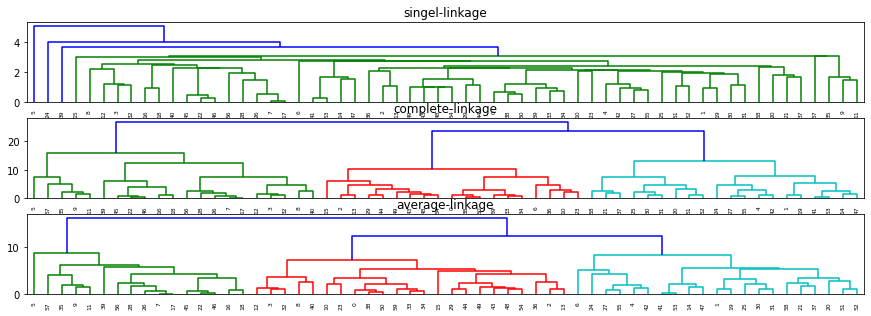

In [280]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
# x asix is size,y is distance
X = np.load('./Data/HC_data.npy')
# (a)
plt.figure(figsize=(15, 5))
fig = plt.subplot(3, 1,1)
link_types = ['single','complete','average']
plt.title("singel-linkage")
Z=linkage(X,link_types[0])
dn = dendrogram(Z)

fig = plt.subplot(3, 1,2)
plt.title("complete-linkage")
Z1=linkage(X,link_types[1]) 
dn1 = dendrogram(Z1)
fig = plt.subplot(3, 1,3)
plt.title("average-linkage")
Z2=linkage(X,link_types[2]) 
dn2 = dendrogram(Z2)

plt.show()

### (b) implement the function, get_longest_lifetime, used to find out the longest K-cluster lifetime from a dendrogram

In [270]:
# (b) Implement the following function to the longest K-cluster lifetime from a dedrogram 
def get_longest_lifetime(Z):
    """
    :param Z:   A (N,4) shape matrix. At the i-th iteration,
                clusters with indices Z[i, 0] and Z[i, 1] are combined
                to form cluster . A cluster with an index less than n
                corresponds to one of the n original observations.
                The distance between clusters Z[i, 0] and Z[i, 1] is
                given by Z[i, 2]. The fourth value Z[i, 3] represents
                the number of original observations in the newly formed cluster.
    :return:    (lifetime, k): [fl oat,int];
                lifetime - the maximum lifetime detected.
                k - number of clusters for which the maximum lifetime was detected.
    """
    lifetime=[] 
    for i in np.arange(1,Z.shape[0]):
        lifetime.append(Z[i,2]-Z[i-1,2]) 
    maxlifetime=np.max(lifetime)  
    ml=lifetime.index(maxlifetime)
    k=Z.shape[0]-ml
    return maxlifetime, k

# Do NOT delete line below
print(get_longest_lifetime(np.array([[0,3],[1,2],[2,3],[2,3]],dtype='float').T))

(1.0, 2)


### (c)
use your get_longest_lifetime function implemented in (b) to report the longest K-cluster lifetimes along with their corresponding K (number of clusters) found in terms of the longest K-cluster lifetime criterion for 3 dendrograms achieved from (a) 

In [271]:
#3 dendrograms's life time corresponding their k
l,k=get_longest_lifetime(Z)
l1,k1=get_longest_lifetime(Z1)
l2,k2=get_longest_lifetime(Z2) 
print("The longest time and k for single -linkage is:",l,k)
print("The longest time and k for complete-linkage is:",l1,k1)
print("The longest time and k for average -linkage is:",l2,k2)

The longest time and k for single -linkage is: 1.04058201064751 2
The longest time and k for complete-linkage is: 7.80320516202468 3
The longest time and k for average -linkage is: 3.7445208818191826 2


Further display 3 partitions corresponding to the longest K-cluster lifetimes. For visualisation, you must arrange 3 plots, each with the explicit cluster-distance metric title, in one row in the order of single-linkage, complete-linkage and group-average from left to right.

In [288]:
# (c) Clustering results
# Your code here:
label_f1=fcluster(Z, t=k, criterion='maxclust')
label_f2=fcluster(Z1, t=k1, criterion='maxclust')
label_f3=fcluster(Z2, t=k2, criterion='maxclust')

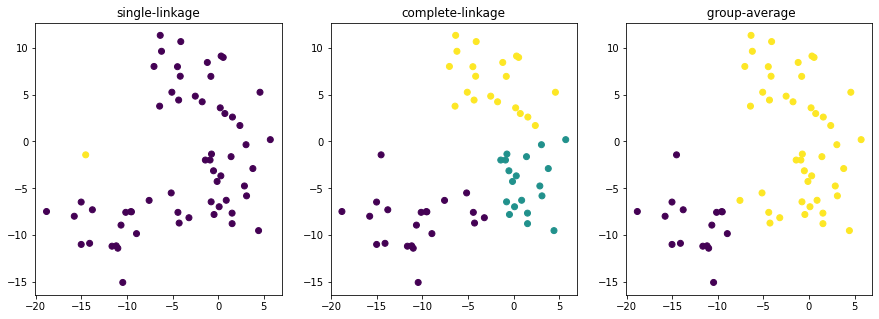

In [289]:
plt.figure(figsize=(15, 5))
fig=plt.subplot(1,3,1)
plt.title("single-linkage")
plt.scatter(X[:,0],X[:,1],c=label_f1)

fig = plt.subplot(1,3,2)
plt.title("complete-linkage")
plt.scatter(X[:,0],X[:,1],c =label_f2)

fig = plt.subplot(1,3,3)
plt.title(" group-average")
plt.scatter(X[:,0],X[:,1],c =label_f3)

plt.show()

## Part 4. Ensemble Clustering Analysis

In [64]:
# Let's firstly compute the co-association matrix for single cluster result

def compute_co_matrix_for_single_cluster(y):
    """
    # Compute the co-association matrix for single clustering result
    # It will also be used later to compute multiple clustering result
    
    Input:
        - y: (n) Label of each Datapoint
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to. Surely,
                      in the case of single cluster result, this number will be
                      either 0 or 1. Whether they belong to the same cluster component
                      can be judged by 'y[i] == y[j]'
    """
    # Firstly set the intial co-association matrix
    N = y.shape[0]
    co_matrix = np.zeros(shape=(N,N))
    r = [[int(i == j) for i in y] for j in y]
    r = np.array(r)
    # Then update the matrix
    r = r * 1
    co_matrix = co_matrix + r
    return co_matrix


# The following code to be used for testing student's implementation during marking. Don't change!
y = np.array([0,1,0,1,0])
co_matrix_tmp = compute_co_matrix_for_single_cluster(y)
co_matrix_tmp

array([[1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.]])

In [66]:
# Now compute the co-association matrix for multiple cluster result
# Hint: You can reuse the 'compute_co_matrix_for_single_cluster(y)' function.

def compute_co_matrix(y_list):
    """
    # Compute the co-association matrix
    
    Input:
        - y_list: List of lenth (N). Each element is a clustering label vector,
                  which is the same as the 'y' defined in function 
                  'compute_co_matrix_for_single_cluster(y)'
                  N is the number of clustering results you are to ensemble.
    
    Return:
        - co_matrix: (N,N). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to, divided
                      by N. 
                      
                      
    """
    N = y_list[0].shape[0]
    co_matrix = np.zeros(shape=(N,N))
    y_len = len(y_list)
    # for each label
    for j in y_list:
        co_matrix += compute_co_matrix_for_single_cluster(j)
    co_matrix = co_matrix / y_len
    return co_matrix
 
# The following code to be used for testing student's implementation during marking. Don't change!
y1 = np.array([0,1,0,1,0])
y2 = np.array([0,1,1,1,0])
y3 = np.array([0,1,1,1,1])
co_matrix_tmp = compute_co_matrix([y1,y2])
co_matrix_tmp

array([[1. , 0. , 0.5, 0. , 1. ],
       [0. , 1. , 0.5, 1. , 0. ],
       [0.5, 0.5, 1. , 0.5, 0.5],
       [0. , 1. , 0.5, 1. , 0. ],
       [1. , 0. , 0.5, 0. , 1. ]])

In [72]:
# Implement the ensemble clustering given a co_matrix
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
def ensemble_clustering(co_matrix, link_type = 'single'):
    """
    Ensemble the clustering results with Agglomerative Clustering
    
    Input: 
        - co_matrix: (n,n) co-assocication matrix. n is the number of datapoints. 
        - linkage: string, can be one of {'single','ward','average','complete'}
        
    Output: 
        - Z: a (?,4) matrix, specifying how datapoints are clustered. 
             At the i-th iteration, clusters with indices Z[i, 0]
             and Z[i, 1] are combined to form cluster. A cluster 
             with an index less than corresponds to one of the 
             original observations. The distance between clusters Z[i, 0] 
             and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] 
             represents the number of original observations in the newly 
             formed cluster.
             
             Z should be the return value of 'scipy.cluster.hierarchy.linkage'
             function.
    """
    D = 1 - co_matrix
    Z = linkage(squareform(D), link_type, metric='euclidean')
    return Z

Apply your ensemble_clustering function implemented in Assignment 7 to two datasets, SC_data_2.npy and SC_data_3.npy, respectively. In your experiment, you are asked to figure out how to decide how many initial partitions need to be generated by K-means algorithm with Euclidean distance and what an appropriate cluster-distance metric is to make the clustering ensemble algorithm work properly on a given dataset. In your answer notebook

### (a) for each of two datasets, describe how you generate initial partitions and what the cluster-distance metric that lead to satisfactory results with justification (you need to state the number of initial partitions and the chosen cluster-distance metric explicitly)

From the course note, it says"30 partitions created with random initialisation and K randomly chosen in the interval [10,30];co-association matrix based on all 30 partitions and 2-D MDS embedding" Therefore the number for initial partitions is 30 and the value for k is a random number between 10 to 30. try 4 different link_types and see the best results

In [68]:
link_types = ['single','ward','average','complete']

The first dataset, Use single distance matrix

In [108]:
X = np.load('./Data/SC_data_2.npy')
y_list = []
p_n=30
for i in range(p_n):
    k=np.random.randint(10,30)
    kmeans_ensemble= KMeans(n_clusters=k).fit(X)
    label_ensem=kmeans_ensemble.labels_
    y_list.append(label_ensem)

In [117]:
co1=compute_co_matrix(y_list)   
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[0])

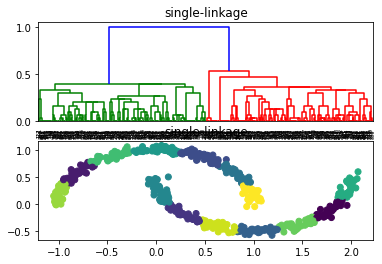

In [118]:
fig = plt.subplot(2,1,1)
plt.title("single-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("single-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

The first dataset, Use wand matrix

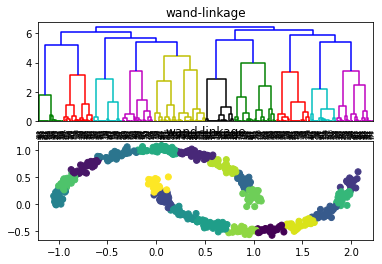

In [114]:

Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[1])
fig = plt.subplot(2,1,1)
plt.title("wand-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("wand-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

The first dataset, Use average complete matrix

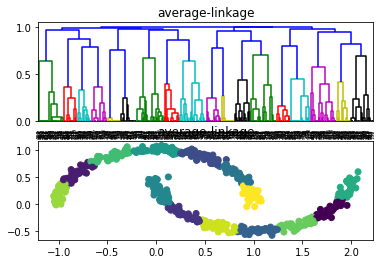

In [115]:

Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[2])
fig = plt.subplot(2,1,1)
plt.title("average-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("average-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

The first dataset, Use complete matrix

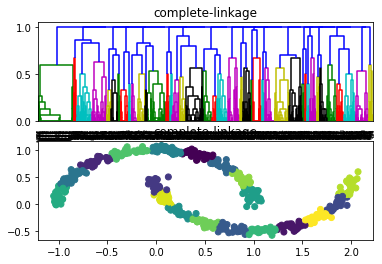

In [127]:
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[3])
fig = plt.subplot(2,1,1)
plt.title("complete-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("complete-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

### the second dataset

In [119]:
X = np.load('./Data/SC_data_3.npy')
y_list = []
p_n=30
for i in range(p_n):
    k=np.random.randint(10,30)
    kmeans_ensemble= KMeans(n_clusters=k).fit(X)
    label_ensem=kmeans_ensemble.labels_
    y_list.append(label_ensem)

In [121]:
co1=compute_co_matrix(y_list)   

single-linkage

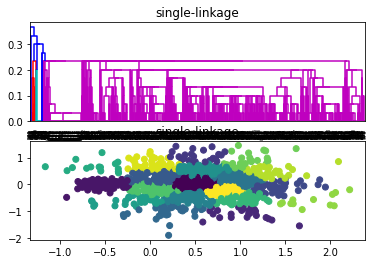

In [129]:
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[0])
fig = plt.subplot(2,1,1)
plt.title("single-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("single-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

wand-linkage

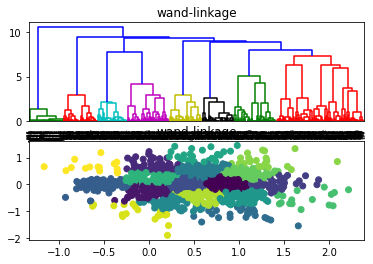

In [123]:
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[1])
fig = plt.subplot(2,1,1)
plt.title("wand-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("wand-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

average-linkage

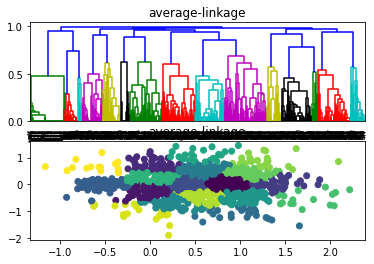

In [124]:
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[2])
fig = plt.subplot(2,1,1)
plt.title("average-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("average-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

complete-linkage

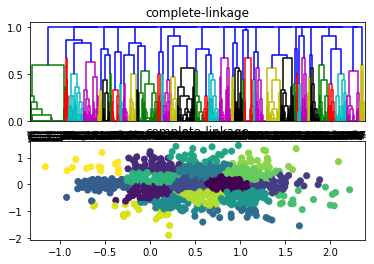

In [125]:
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[3])
fig = plt.subplot(2,1,1)
plt.title("complete-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.title("complete-linkage")
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()

### The final best results for SC_data_2 after parameter tunning
 initial partitions is 30 and the value for k is a random number between 10 to 30

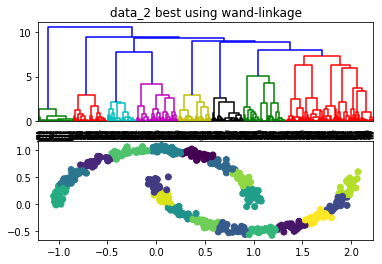

In [126]:
X = np.load('./Data/SC_data_2.npy')
y_list = []
p_n=30
for i in range(p_n):
    k=np.random.randint(10,30)
    kmeans_ensemble= KMeans(n_clusters=k).fit(X)
    label_ensem=kmeans_ensemble.labels_
    y_list.append(label_ensem)
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[1])
fig = plt.subplot(2,1,1)
plt.title("data_2 best using wand-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)
plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()


### The final best results for SC_data_3 after parameter tunning
 initial partitions is 30 and the value for k is a random number between 10 to 30

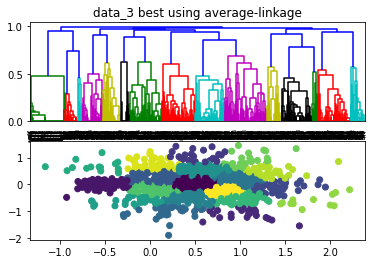

In [128]:
X = np.load('./Data/SC_data_3.npy')
y_list = []
p_n=30
for i in range(p_n):
    k=np.random.randint(10,30)
    kmeans_ensemble= KMeans(n_clusters=k).fit(X)
    label_ensem=kmeans_ensemble.labels_
    y_list.append(label_ensem)
Z1=ensemble_clustering(co_matrix=co1, link_type = link_types[2])
fig = plt.subplot(2,1,1)
plt.title("data_3 best using average-linkage")
dn1 = dendrogram(Z1)
fig = plt.subplot(2,1,2)

plt.scatter(X[:,0],X[:,1],c =label_ensem)
plt.show()